In [1]:
import pandas as pd
import numpy as np
from os import listdir
from math import radians, cos, sin, asin, sqrt
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### READ DATA

In [2]:
all_df = pd.read_pickle('all_df.pkl')

## Question 1

We have data of San Francisco taxi cabs with 11 million rows. 538 taxi cab data is collected over a month period.


Question 1 : 
To calculate the potential for a yearly reduction in CO2 emissions, caused by the taxi cabs roaming without passengers. In your calculation please assume that the taxicab fleet is changing at the rate of 15% per month (from combustion engine-powered vehicles to electric vehicles). Assume also that the average passenger vehicle emits about 404 grams of CO2 per mile.

In [3]:
all_df.head()

,latitude,longitude,occupation,time,taxi_id,next_latitude,next_longitude,next_occupation_status,previous_occupation_status,next_time,distance_miles,target_column,day_of_week,hour,holiday
0,37.79826,-122.26613,0,2008-05-17 17:25:37,new_adkavy,37.79596,-122.26824,0.0,NaN,1.211034e+09,0.196289,37.79-122.41,5,17,0
1,37.79596,-122.26824,0,2008-05-17 17:26:38,new_adkavy,37.80031,-122.27920,0.0,0.0,1.211034e+09,0.669654,37.79-122.41,5,17,0
2,37.80031,-122.27920,0,2008-05-17 17:27:47,new_adkavy,37.80219,-122.29588,0.0,0.0,1.211035e+09,0.919894,37.79-122.41,5,17,0
3,37.80219,-122.29588,0,2008-05-17 17:28:35,new_adkavy,37.81305,-122.30235,0.0,0.0,1.211035e+09,0.829372,37.79-122.41,5,17,0
4,37.81305,-122.30235,0,2008-05-17 17:29:35,new_adkavy,37.82369,-122.30235,0.0,0.0,1.211035e+09,0.735198,37.79-122.41,5,17,0


First I wrote a function that aggregates by taxi id, find occupation status with zero and sum the distances. After that I multiply this value with 404 grams which an average passenger emits CO2 per mile. 

### USER DEFINED FUNCTIONS

In [4]:
def agg_wo_passangers(df):
    agg_df = pd.DataFrame(columns=['taxi_id','CO2_consumption'])
    for taxi in df.taxi_id.unique():
        #print(taxi)
        temp_df = all_df[all_df['taxi_id']==taxi]
        temp_df = temp_df[temp_df['occupation']==0]
        total = temp_df.distance_miles.sum()
        total = total*404
        agg_df = agg_df.append({'taxi_id':taxi,'CO2_consumption':total},ignore_index=True)
    return agg_df   

In [5]:
agg_df = agg_wo_passangers(all_df)

 with the below function, I intended to calculate total consumption if 15% percent of taxi cabs are changed to combustion engine powered vehicles. Also, I calculated the total consumption if none of the taxis are changed.

In [10]:
def calculate_reduction_rate():    
    for month in range(12):
        if month==0:
            total_consumption=  agg_df.CO2_consumption.sum()
            selected_df = agg_df.sample(frac=0.85)
        else:
            total_consumption = total_consumption + selected_df.CO2_consumption.sum()
            selected_df = selected_df.sample(frac=0.85)
        #print(total_consumption)
    total_wo_electric = agg_df.CO2_consumption.sum()*12
    CO2_red  = (total_wo_electric - total_consumption)/total_wo_electric
    return CO2_red
print(f'CO2 reduction rate : {round(calculate_reduction_rate() * 100,2)} %')

CO2 reduction rate : 51.43 %


I wanted to simulate whole process for 1000 times and want to see distrubiton of results

### SIMULATION

In [11]:
simulation_results = []
for i in range(1000):
    CO2_red = calculate_reduction_rate()
    simulation_results.append(CO2_red)

Text(0, 0.5, 'count')

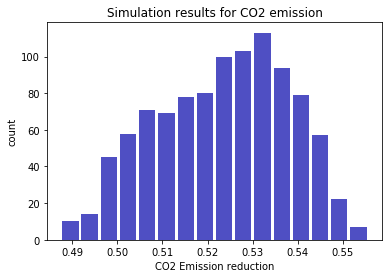

In [12]:
plt.hist(simulation_results, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.title('Simulation results for CO2 emission')
plt.xlabel('CO2 Emission reduction')
plt.ylabel('count')